In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

        


In [57]:
def plot_symmetry(pvec):
    
    n=1000
    l=len(pvec)
    pvec = np.array(sorted(pvec))
    seats = []
    votes = []
    small = pvec[0]
    large = pvec[-1]
    
    gap = large - small
    
    
    
    mean = np.mean(pvec)
    
    lvec = pvec - mean*np.ones([1,l])
    
    
    
    for t in range(n):
        tvec = lvec + (t/n)*np.ones([1,l])
        votes.append(np.mean(tvec))
        seats.append(sum(sum(tvec>=.5))/l)
        
    
    bn = np.array([mean+ (.5-x) for x in pvec])
    
    
    cn=[str(round(float(bn), 3)) for bn in bn]
    bvotes=[]
    bseats=[]
    
    for t in range(n):
        bvotes.append(t/n)
        bseats.append(sum(bn<(t/n))/l)
        
    
    bn = np.array([mean+ (.5-x) for x in pvec])
    
    bvotes=[]
    bseats=[]
    
    for t in range(n):
        bvotes.append(t/n)
        bseats.append(sum(bn<(t/n))/l)
        
    dn=list(bn[:])
    for x in bn:
        dn.append(1-x)
        
    rseats=list(reversed(seats))

            
    en=[str(round(float(dn), 3)) for dn in dn]
    area=0
    for t in range(n):
        area += (1/n)*abs(seats[t]-(1-rseats[t])) 



    plt.figure(figsize=(18,6) )   
    plt.plot(bvotes,bseats,linewidth = 5)

    plt.plot([.5],[.5],'ro', markersize=10)
    plt.plot([mean],[sum(pvec>=.5)/l],'g*', markersize=20)

    plt.xlabel("Vote %")
    plt.ylabel("Seat %")
    plt.xticks(bn,cn, rotation=45)
    ys=[x/l for x in range(l+1)]
    zs=[str(round(float(ys), 3)) for ys in ys]
    plt.yticks(ys,zs)

    plt.title("Seats -- Votes")

    plt.show()


    fig, ax = plt.subplots(1,figsize=(18,6))    

    rseats=list(reversed(seats))


    errorboxes = []
    for t in range(n):
        rect = Rectangle((t/n, min(seats[t],1-rseats[t])), 1/n,abs(seats[t]-(1-rseats[t])))
        errorboxes.append(rect)


    pc = PatchCollection(errorboxes, facecolor='gray', edgecolor=None)

    ax.add_collection(pc)
    plt.plot([.5],[.5],'ro', markersize=10)
    plt.plot(votes,seats,'b',label='Original')


    plt.plot(votes,[1-x for x in rseats],'y',label="Flipped")



    plt.legend()    
    plt.xlabel("Vote %")
    plt.ylabel("Seat %")



    plt.xticks(dn,en, rotation=45)
    ys=[x/l for x in range(l+1)]
    zs=[str(round(float(ys), 3)) for ys in ys]
    plt.yticks(ys,zs)
    plt.title("Seats -- Votes: Symmetry Gaps")

    


In [58]:
def partisan_metrics(pvec):
    #Based on Parker's GerryChain Function
    l=len(pvec)
    
    pvec = np.array(sorted(pvec))
    
    mean = np.mean(pvec)
        
    jumps = [mean - p +.5 for p in sorted(pvec,reverse=True)]
    
    reverse_jumps = reversed([1-s for s in jumps])
    
    rectangle_area = (1/len(pvec)) * sum(abs(s - r) for s, r in zip(jumps, reverse_jumps))
    
    print("Partisan Gini", rectangle_area)
    print("Mean-Median", np.median(pvec)-mean)
    print("Efficiency Gap", 2*mean - sum(pvec>=.5)/len(pvec) - .5)

    print("Jumps", jumps)
    print("Reverse Jumps", [1-x for x in jumps])
    
    return jumps


Partisan Gini 0.05046366782006921
Mean-Median -0.011588235294117566
Efficiency Gap 0.06376470588235283
Jumps [0.11258823529411754, 0.25658823529411756, 0.34158823529411764, 0.3945882352941176, 0.4115882352941176, 0.45758823529411763, 0.48358823529411765, 0.5005882352941176, 0.5115882352941176, 0.5595882352941176, 0.5595882352941176, 0.5735882352941176, 0.6255882352941176, 0.6365882352941177, 0.6435882352941176, 0.7065882352941175, 0.7245882352941175]
Reverse Jumps [0.8874117647058825, 0.7434117647058824, 0.6584117647058824, 0.6054117647058824, 0.5884117647058824, 0.5424117647058824, 0.5164117647058823, 0.49941176470588244, 0.48841176470588243, 0.4404117647058824, 0.4404117647058824, 0.4264117647058824, 0.37441176470588244, 0.3634117647058823, 0.35641176470588243, 0.2934117647058825, 0.27541176470588247]


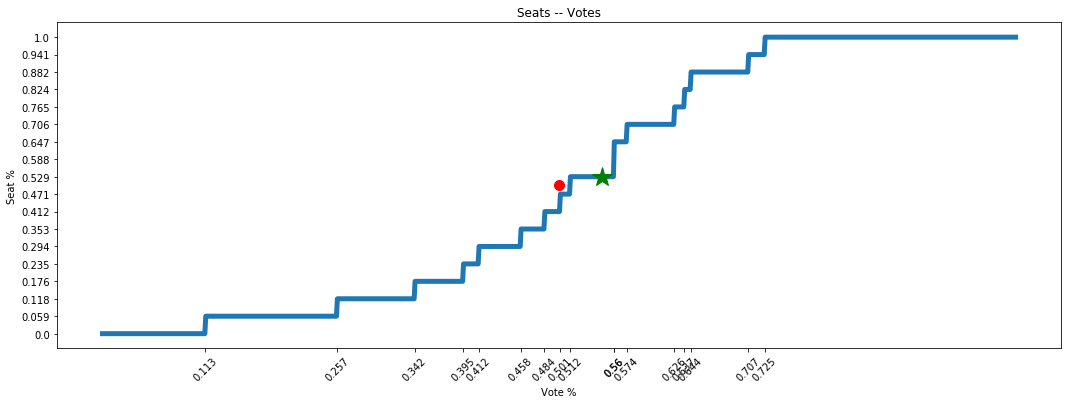

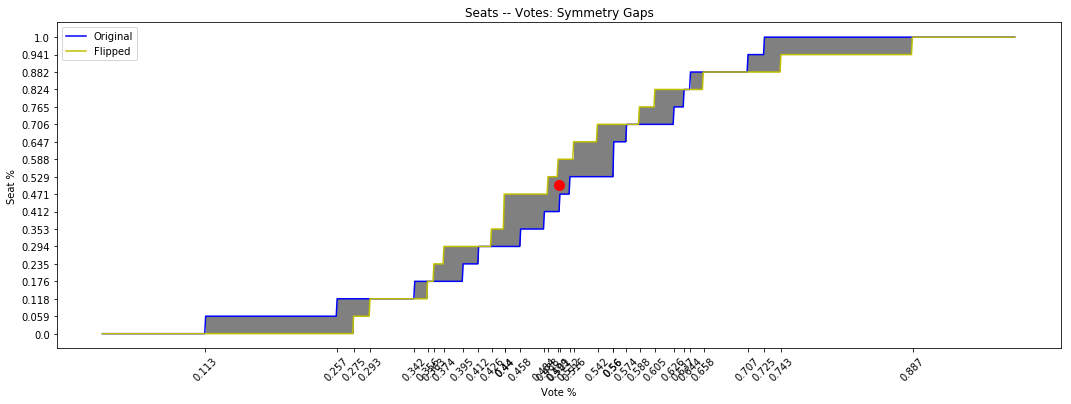

In [59]:
partisan_metrics([.487,.79,.934,.635,.652,.589,.535,.546,.403,.487,.41,.34,.705,.421,.322,.473,.563])
plot_symmetry([.487,.79,.934,.635,.652,.589,.535,.546,.403,.487,.41,.34,.705,.421,.322,.473,.563])